## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

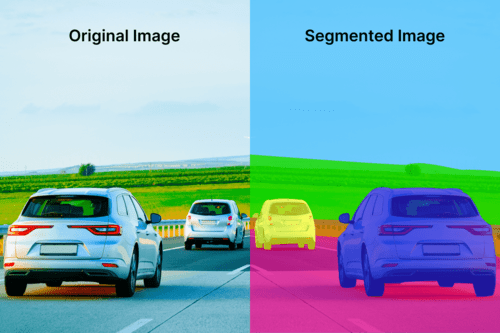

## Load Data

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
im =  cv2.imread('elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


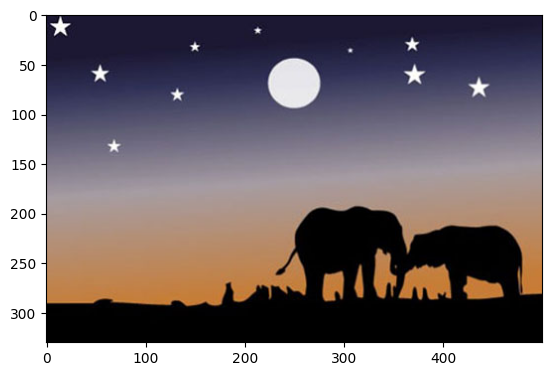

In [5]:
plt.imshow(im) # as RGB Format
plt.show()

In [6]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








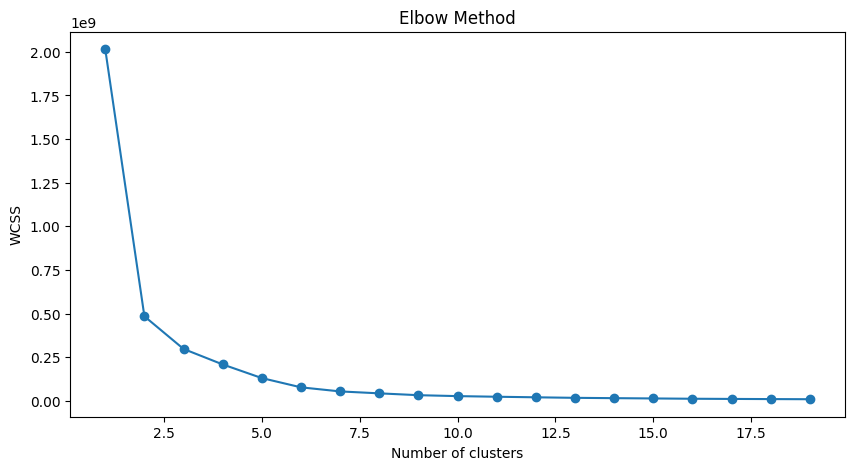

In [8]:

# Elbow Method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(all_pixels)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Visualize Dominant Color

In [9]:
dominant_colors = 6
kmeans = KMeans(n_clusters=dominant_colors, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(all_pixels)

KMeans(n_clusters=6, n_init=10, random_state=0)

In [10]:
centers = kmeans.cluster_centers_
print(centers) # In RGB Format

[[159.58343371 143.81351339 144.67539146]
 [  1.47632845   0.82528829   1.14495567]
 [ 92.07284087  89.25825064 114.15663359]
 [189.03373262 132.37564826  83.16512919]
 [232.70848846 232.40022338 236.70439315]
 [ 36.78899211  33.9583766   63.01630694]]


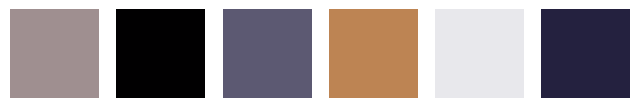

In [11]:
i = 1
plt.figure(0,figsize=(8,2))
# Storing info in color array
colors = []
for each_col in centers:
    plt.subplot(1,6,i)
    plt.axis("off")
    i+=1

    colors.append(each_col)

    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

## Segmenting original image

In [12]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


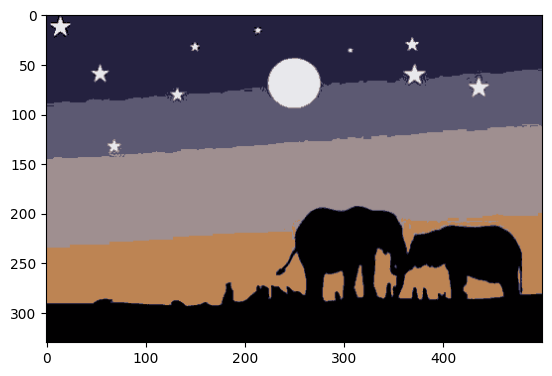

In [13]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()